In [1]:
import numpy as np
import gzip
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def load_mnist(path, kind='train'):
    labels_path = f'{path}/{kind}-labels-idx1-ubyte.gz'
    images_path = f'{path}/{kind}-images-idx3-ubyte.gz'
    
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)
       
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)
    
    return images, labels

train_images, train_labels = load_mnist('.', kind='train')
test_images, test_labels = load_mnist('.', kind='t10k')

In [3]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

In [5]:
from sklearn.model_selection import train_test_split

# Splitting training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [6]:
datagen = ImageDataGenerator(
    rotation_range=6, 
    width_shift_range=0.05, 
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True
)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9), 
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train, 
    epochs=100,
    batch_size=128,
    validation_data=(X_val, y_val)
)

Epoch 1/100
375/375 [==============================] - 9s 24ms/step - loss: 0.4576 - accuracy: 0.8351 - val_loss: 0.6135 - val_accuracy: 0.7807
Epoch 2/100
375/375 [==============================] - 9s 23ms/step - loss: 0.3021 - accuracy: 0.8881 - val_loss: 0.3365 - val_accuracy: 0.8711
Epoch 3/100
375/375 [==============================] - 9s 24ms/step - loss: 0.2594 - accuracy: 0.9031 - val_loss: 0.2887 - val_accuracy: 0.8947
Epoch 4/100
375/375 [==============================] - 9s 24ms/step - loss: 0.2411 - accuracy: 0.9104 - val_loss: 0.2962 - val_accuracy: 0.8911
Epoch 5/100
120/375 [========>.....................] - ETA: 5s - loss: 0.2130 - accuracy: 0.9184

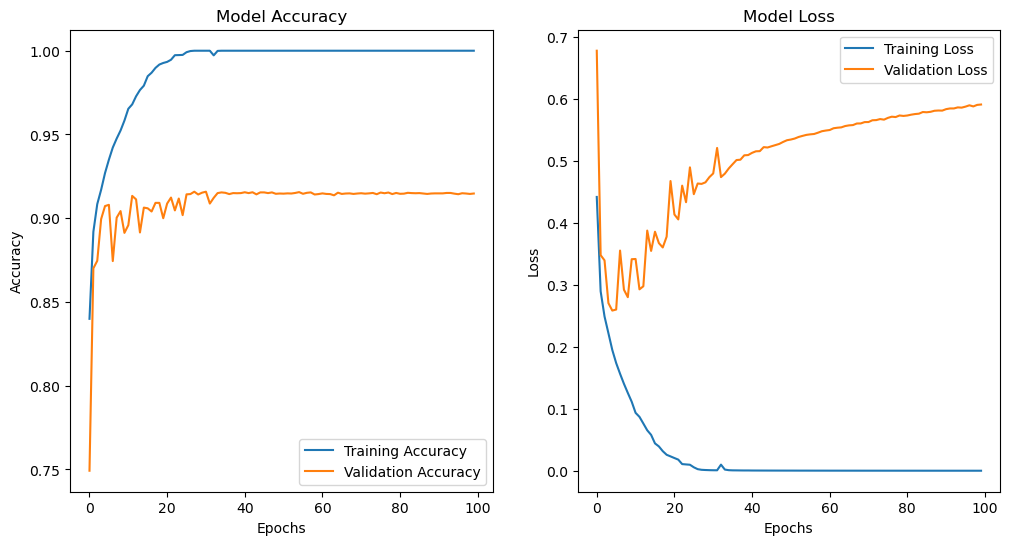

In [15]:
# Plot for accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')
model.save('fashion_mnist_model.keras')

313/313 [==============================] - 1s 3ms/step - loss: 0.6774 - accuracy: 0.9084
Test loss: 0.6773542761802673, Test accuracy: 0.9083999991416931
